In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv("sample_sales_data.csv")
print(data)

      Unnamed: 0                        transaction_id            timestamp  \
0              0  a1c82654-c52c-45b3-8ce8-4c2a1efe63ed  2022-03-02 09:51:38   
1              1  931ad550-09e8-4da6-beaa-8c9d17be9c60  2022-03-06 10:33:59   
2              2  ae133534-6f61-4cd6-b6b8-d1c1d8d90aea  2022-03-04 17:20:21   
3              3  157cebd9-aaf0-475d-8a11-7c8e0f5b76e4  2022-03-02 17:23:58   
4              4  a81a6cd3-5e0c-44a2-826c-aea43e46c514  2022-03-05 14:32:43   
...          ...                                   ...                  ...   
7824        7824  6c19b9fc-f86d-4526-9dfe-d8027a4d13ee  2022-03-03 18:22:09   
7825        7825  1c69824b-e399-4b79-a5e7-04a3a7db0681  2022-03-04 19:14:46   
7826        7826  79aee7d6-1405-4345-9a15-92541e9e1e74  2022-03-03 14:00:09   
7827        7827  e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55  2022-03-04 15:11:38   
7828        7828  afd70b4f-ee21-402d-8d8f-0d9e13c2bea6  2022-03-06 13:50:36   

                                product_id         

In [3]:
data.drop_duplicates(subset=['transaction_id', 'product_id'], keep='first', inplace=True)
data

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card
...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash


In [4]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp']

0      2022-03-02 09:51:38
1      2022-03-06 10:33:59
2      2022-03-04 17:20:21
3      2022-03-02 17:23:58
4      2022-03-05 14:32:43
               ...        
7824   2022-03-03 18:22:09
7825   2022-03-04 19:14:46
7826   2022-03-03 14:00:09
7827   2022-03-04 15:11:38
7828   2022-03-06 13:50:36
Name: timestamp, Length: 7829, dtype: datetime64[ns]

In [5]:
data['product_id'] = data['product_id'].astype('category')
data['product_id']
data['transaction_id'] = data['transaction_id'].astype('category')
data['transaction_id']

0       a1c82654-c52c-45b3-8ce8-4c2a1efe63ed
1       931ad550-09e8-4da6-beaa-8c9d17be9c60
2       ae133534-6f61-4cd6-b6b8-d1c1d8d90aea
3       157cebd9-aaf0-475d-8a11-7c8e0f5b76e4
4       a81a6cd3-5e0c-44a2-826c-aea43e46c514
                        ...                 
7824    6c19b9fc-f86d-4526-9dfe-d8027a4d13ee
7825    1c69824b-e399-4b79-a5e7-04a3a7db0681
7826    79aee7d6-1405-4345-9a15-92541e9e1e74
7827    e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55
7828    afd70b4f-ee21-402d-8d8f-0d9e13c2bea6
Name: transaction_id, Length: 7829, dtype: category
Categories (7829, object): ['00096349-108b-43c3-97a9-2e9a98c31884', '0012181c-a6b3-4ba3-9dc3-f397bdfdd664',
                            '00138ea3-611c-438b-a90d-dfea0430d024', '001b4ec2-c34a-44e3-b6b4-ee1facf03b39', ...,
                            'fff64092-d619-49ea-82cf-6af42a6ecf16', 'fffcff4f-303c-461e-b676-669cdd7a3080',
                            'ffff3153-33a3-4d8d-b967-72a5c721ac2c', 'ffff6f45-08fc-4329-82b7-838a2bb5044b']

In [6]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


date
2022-03-01    1165
2022-03-02    1168
2022-03-03    1078
2022-03-04    1108
2022-03-05    1074
2022-03-06    1132
2022-03-07    1104
Name: transaction_id, dtype: int64


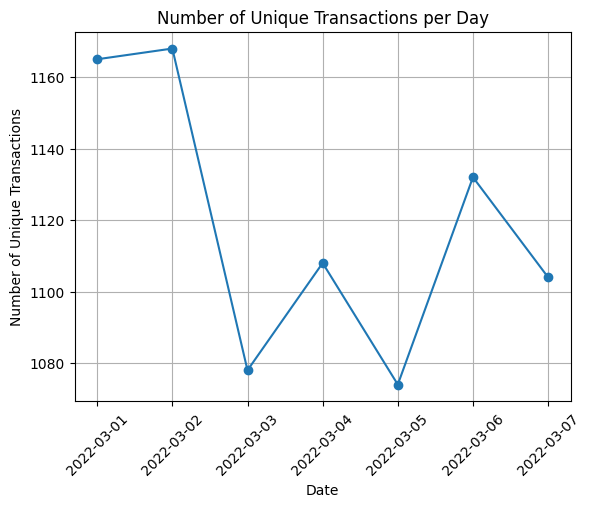

In [45]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['date'] = data['timestamp'].dt.date
daily_customers = data.groupby('date')['transaction_id'].nunique()
print(daily_customers)
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Unique Transactions')
plt.title('Number of Unique Transactions per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
daily_sales = data.groupby('date')['total'].sum()
print(daily_sales)
avg_sales_inweek = daily_sales.sum()/7
print(avg_sales_inweek)

date
2022-03-01    22183.96
2022-03-02    22500.79
2022-03-03    21405.47
2022-03-04    22262.64
2022-03-05    21803.03
2022-03-06    21865.79
2022-03-07    22287.17
Name: total, dtype: float64
22044.12142857143


In [9]:
sales_per_customer = daily_sales/daily_customers
print(sales_per_customer)
avg_sales_per_customer_inweek = sales_per_customer.sum()/7
print(avg_sales_per_customer_inweek)

date
2022-03-01    19.042026
2022-03-02    19.264375
2022-03-03    19.856651
2022-03-04    20.092635
2022-03-05    20.300773
2022-03-06    19.316069
2022-03-07    20.187654
dtype: float64
19.722883291155743


In [10]:
daily_sales_data = daily_sales.reset_index()
daily_sales_data.rename(columns = {'total': 'Total_Sales'}, inplace = True)
data = pd.merge(data, daily_sales_data, on='date', how='left')
data

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,Total_Sales
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02,22500.79
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06,21865.79
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04,22262.64
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02,22500.79
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022-03-05,21803.03
...,...,...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet,2022-03-03,21405.47
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,2022-03-04,22262.64
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card,2022-03-03,21405.47
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,2022-03-04,22262.64


In [11]:
data = data.sort_values('date', ascending = True)
data

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,Total_Sales
7000,69f2a397-301b-423d-8552-1e992ff5d129,2022-03-01 17:18:56,79eab594-7c8c-4868-af6d-3bf0996b5010,medicine,standard,11.49,4,45.96,e-wallet,2022-03-01,22183.96
1575,9423c4e4-ce2e-42a3-bc07-0ad764e1ef21,2022-03-01 15:24:44,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,vegetables,basic,1.49,1,1.49,debit card,2022-03-01,22183.96
1576,5e5a69f6-58e4-44ea-b72d-8780c8a6266e,2022-03-01 18:59:55,89968f6a-b575-46ff-b71e-2238826be41b,vegetables,premium,1.49,4,5.96,credit card,2022-03-01,22183.96
1237,5b9dee6e-0424-429a-b5fd-be4189d8b850,2022-03-01 16:12:00,a13bd36b-acd1-402a-a009-4d1472e5e34a,vegetables,gold,1.99,2,3.98,debit card,2022-03-01,22183.96
6427,75c315c0-bd47-44aa-9a3f-665afeb0a206,2022-03-01 18:19:55,b9c11cb8-14ab-4d09-96ce-5ecf041999d3,baby products,standard,15.99,3,47.97,e-wallet,2022-03-01,22183.96
...,...,...,...,...,...,...,...,...,...,...,...
7031,f0cc548d-2cdc-496f-8c39-33a7f1baccd0,2022-03-07 13:17:33,100ab1ec-39f5-41bd-984f-485039575827,medicine,premium,19.99,1,19.99,cash,2022-03-07,22287.17
2355,b5345fd9-0852-4fb4-b164-60b103ed7436,2022-03-07 19:27:22,0f80f0b5-2488-46e1-a8b7-8bb24be25a40,frozen,non-member,13.19,2,26.38,credit card,2022-03-07,22287.17
2353,3d503a64-9584-49f7-989c-4ab6ab786a93,2022-03-07 12:58:19,371af9e4-5eae-4b90-b842-d7e532fa9943,frozen,standard,11.49,3,34.47,e-wallet,2022-03-07,22287.17
954,a93462a1-1e4d-43a8-ae0c-c1dfcd0ba76a,2022-03-07 17:34:02,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,non-member,0.49,2,0.98,cash,2022-03-07,22287.17


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 7000 to 1319
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   category      
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   category      
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
 9   date            7829 non-null   object        
 10  Total_Sales     7829 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 971.9+ KB


In [13]:
num_category = data['category'].unique()
num_category

array(['medicine', 'vegetables', 'baby products', 'packaged foods',
       'kitchen', 'snacks', 'baked goods', 'condiments and sauces',
       'fruit', 'canned foods', 'frozen', 'personal care',
       'spices and herbs', 'beverages', 'baking', 'meat',
       'refrigerated items', 'cheese', 'cleaning products', 'seafood',
       'pets', 'dairy'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['category_encoder'] = le.fit_transform(data['category'])
data['customer_type_encoded'] = le.fit_transform(data['customer_type'])
data['payment_type_encoded'] = le.fit_transform(data['payment_type'])
data

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,Total_Sales,category_encoder,customer_type_encoded,payment_type_encoded
7000,69f2a397-301b-423d-8552-1e992ff5d129,2022-03-01 17:18:56,79eab594-7c8c-4868-af6d-3bf0996b5010,medicine,standard,11.49,4,45.96,e-wallet,2022-03-01,22183.96,13,4,3
1575,9423c4e4-ce2e-42a3-bc07-0ad764e1ef21,2022-03-01 15:24:44,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,vegetables,basic,1.49,1,1.49,debit card,2022-03-01,22183.96,21,0,2
1576,5e5a69f6-58e4-44ea-b72d-8780c8a6266e,2022-03-01 18:59:55,89968f6a-b575-46ff-b71e-2238826be41b,vegetables,premium,1.49,4,5.96,credit card,2022-03-01,22183.96,21,3,1
1237,5b9dee6e-0424-429a-b5fd-be4189d8b850,2022-03-01 16:12:00,a13bd36b-acd1-402a-a009-4d1472e5e34a,vegetables,gold,1.99,2,3.98,debit card,2022-03-01,22183.96,21,1,2
6427,75c315c0-bd47-44aa-9a3f-665afeb0a206,2022-03-01 18:19:55,b9c11cb8-14ab-4d09-96ce-5ecf041999d3,baby products,standard,15.99,3,47.97,e-wallet,2022-03-01,22183.96,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7031,f0cc548d-2cdc-496f-8c39-33a7f1baccd0,2022-03-07 13:17:33,100ab1ec-39f5-41bd-984f-485039575827,medicine,premium,19.99,1,19.99,cash,2022-03-07,22287.17,13,3,0
2355,b5345fd9-0852-4fb4-b164-60b103ed7436,2022-03-07 19:27:22,0f80f0b5-2488-46e1-a8b7-8bb24be25a40,frozen,non-member,13.19,2,26.38,credit card,2022-03-07,22287.17,9,2,1
2353,3d503a64-9584-49f7-989c-4ab6ab786a93,2022-03-07 12:58:19,371af9e4-5eae-4b90-b842-d7e532fa9943,frozen,standard,11.49,3,34.47,e-wallet,2022-03-07,22287.17,9,4,3
954,a93462a1-1e4d-43a8-ae0c-c1dfcd0ba76a,2022-03-07 17:34:02,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,non-member,0.49,2,0.98,cash,2022-03-07,22287.17,10,2,0


Descriptive Statistics Analysis

In [16]:
mean_sales = np.mean(data['Total_Sales'])
print(f"Mean Sales in the week {mean_sales}")
median_sales = np.median(data['Total_Sales'])
print(f"Median sales in the week {median_sales}")
std_sales = np.std(data['Total_Sales'])
print(f"Standard Deviation in sales {std_sales}")
max_sales = np.max(data['Total_Sales'])
min_sales = np.min(data['Total_Sales'])
print(f"Max sales = {max_sales}, Min sales = {min_sales}")

Mean Sales in the week 22051.46277685528
Median sales in the week 22183.96
Standard Deviation in sales 343.20608798422126
Max sales = 22500.79, Min sales = 21405.47


**Change of sales over the week**



*   Highest Sales on 2022-03-02
*   Lowest Sales on 2022-03-03



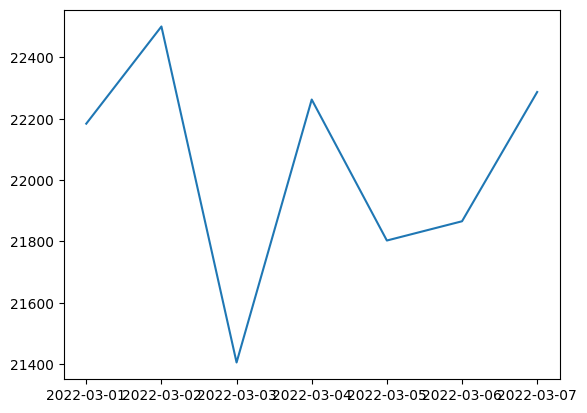

In [17]:
plt.plot(data['date'], data['Total_Sales'])

date
2022-03-01         NaN
2022-03-02    0.014282
2022-03-03   -0.048679
2022-03-04    0.040044
2022-03-05   -0.020645
2022-03-06    0.002878
2022-03-07    0.019271
Name: total, dtype: float64


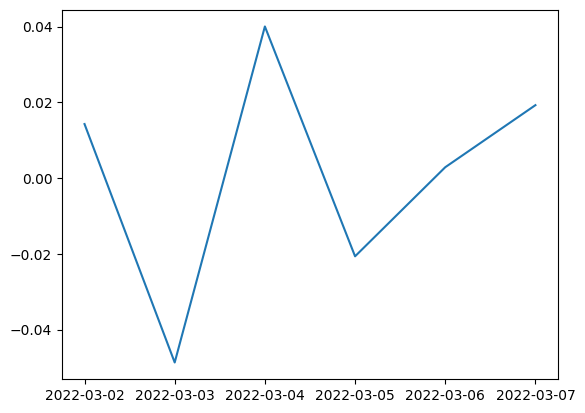

In [19]:
daily_sales_pct_change = daily_sales.pct_change()
plt.plot(daily_sales_pct_change.index, daily_sales_pct_change.values)
print(daily_sales_pct_change)


fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

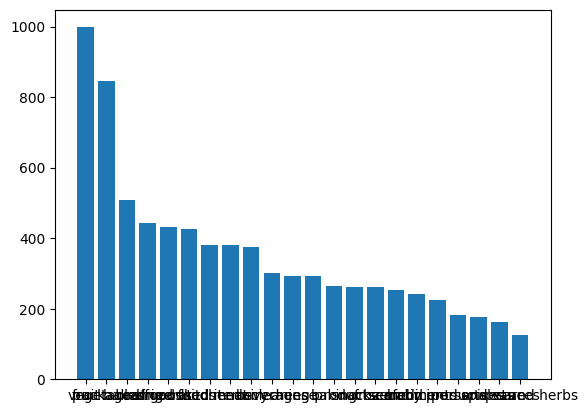

In [20]:
counts = data['category'].value_counts()
plt.bar(counts.index, counts.values)
counts

In [21]:
product_sales = data.groupby('category')['quantity'].sum()
product_sales = product_sales.sort_values(ascending = False)
product_sales

category
fruit                    2439
vegetables               2124
packaged foods           1280
baked goods              1089
canned foods             1082
refrigerated items       1065
kitchen                   955
dairy                     950
meat                      939
cheese                    783
beverages                 776
cleaning products         725
seafood                   669
frozen                    660
snacks                    652
baking                    648
medicine                  602
baby products             543
personal care             455
condiments and sauces     450
pets                      395
spices and herbs          304
Name: quantity, dtype: int64

Most Sold Product is Fruit

           date            category  quantity
0    2022-03-01       baby products        77
1    2022-03-01         baked goods       174
2    2022-03-01              baking       109
3    2022-03-01           beverages       112
4    2022-03-01        canned foods       184
..          ...                 ...       ...
149  2022-03-07  refrigerated items       133
150  2022-03-07             seafood       120
151  2022-03-07              snacks       108
152  2022-03-07    spices and herbs        64
153  2022-03-07          vegetables       254

[154 rows x 3 columns]


<Axes: xlabel='date'>

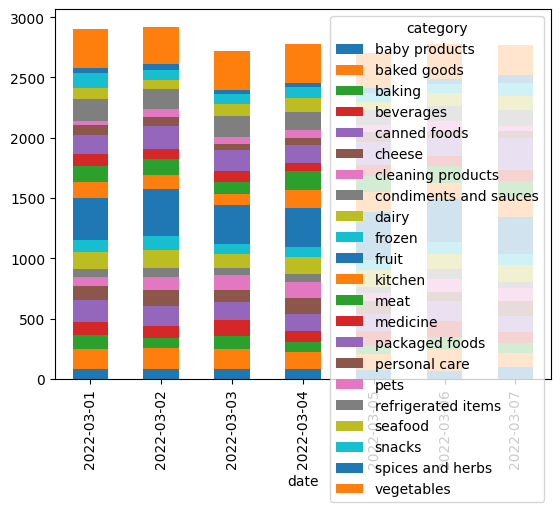

In [22]:
sales_by_date_product = data.groupby(['date', 'category'])['quantity'].sum().reset_index()
print(sales_by_date_product)
pivot_data = sales_by_date_product.pivot(index = 'date', columns = 'category', values = 'quantity')
pivot_data.plot(kind='bar', stacked=True)

         date    category  quantity
0  2022-03-01       fruit       350
1  2022-03-02       fruit       394
2  2022-03-03  vegetables       325
3  2022-03-04       fruit       326
4  2022-03-05       fruit       394
5  2022-03-06       fruit       350
6  2022-03-07       fruit       307


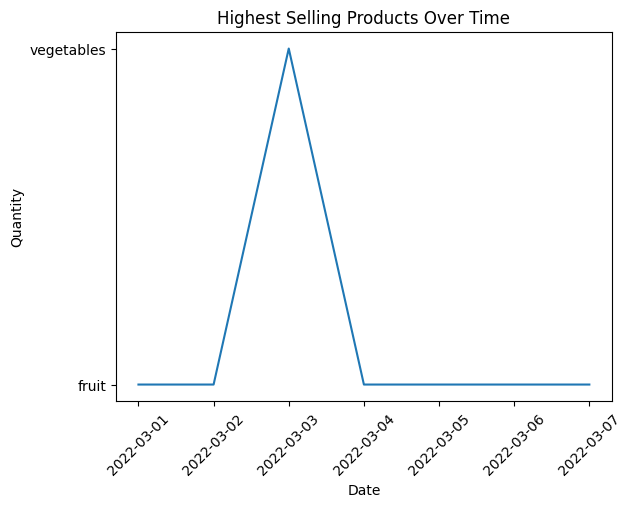

In [28]:
pivot_data
sorted = sales_by_date_product.sort_values(['date', 'quantity'], ascending=[True, False])
highest_selling = sorted.groupby('date').first().reset_index()
print(highest_selling)

plt.plot(highest_selling['date'], highest_selling['category'])
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Highest Selling Products Over Time')
plt.xticks(rotation=45)
plt.show()

In [36]:
sorted_low = sales_by_date_product.sort_values(['date', 'quantity'])
lowest_selling = sorted.groupby('date').last()
print(lowest_selling)


                    category  quantity
date                                  
2022-03-01              pets        35
2022-03-02  spices and herbs        50
2022-03-03  spices and herbs        31
2022-03-04  spices and herbs        31
2022-03-05  spices and herbs        42
2022-03-06  spices and herbs        41
2022-03-07              pets        41


In [37]:

total_sales = data.groupby(['date', 'category'])['total'].sum().reset_index()
num_transaction = data.groupby(['date', 'category'])['transaction_id'].nunique().reset_index()
num_transaction = num_transaction.rename(columns = {'transaction_id': 'Num_Transaction'})
sales_data = pd.merge(total_sales, num_transaction, on = ['date', 'category'])
sales_data['Avg_Sales']= sales_data['total']/ sales_data['Num_Transaction']
avg_sales_data = sales_data.groupby('category')['Avg_Sales'].mean().sort_values(ascending = False)
print (avg_sales_data)

category
seafood                  42.907291
medicine                 42.777157
kitchen                  37.704244
meat                     36.926684
beverages                32.947488
cleaning products        32.504551
baby products            29.986717
pets                     26.000686
frozen                   25.175137
personal care            23.432425
cheese                   23.243789
dairy                    20.158717
baked goods              18.786805
condiments and sauces    17.554509
refrigerated items       17.509487
canned foods             15.693694
baking                   12.965349
packaged foods           12.487397
spices and herbs          7.476540
fruit                     6.118345
vegetables                5.995682
snacks                    5.921164
Name: Avg_Sales, dtype: float64


customer_type
non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: transaction_id, dtype: int64


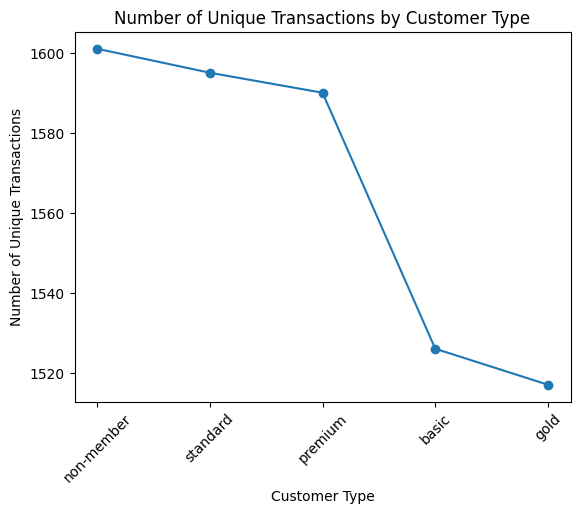

In [43]:
customer_type1 = data.groupby('customer_type')['transaction_id'].nunique()
customer_type1_sorted = customer_type1.sort_values(ascending=False)
print(customer_type1_sorted)
plt.plot(customer_type1_sorted.index, customer_type1_sorted.values, marker='o')
plt.xlabel('Customer Type')
plt.ylabel('Number of Unique Transactions')
plt.title('Number of Unique Transactions by Customer Type')
plt.xticks(rotation=45)
plt.show()

payment_type
cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: transaction_id, dtype: int64


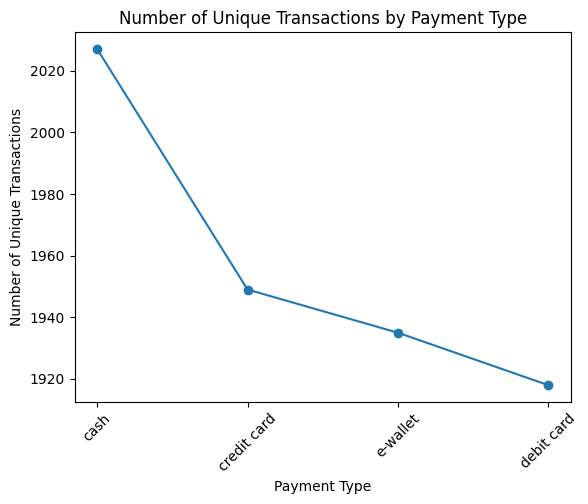

In [42]:
payment_type = data.groupby('payment_type')['transaction_id'].nunique()
payment_type_sorted = payment_type.sort_values(ascending=False)
print(payment_type_sorted)
plt.plot(payment_type_sorted.index, payment_type_sorted.values, marker='o')
plt.xlabel('Payment Type')
plt.ylabel('Number of Unique Transactions')
plt.title('Number of Unique Transactions by Payment Type')
plt.xticks(rotation=45)
plt.show()

hour
11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: transaction_id, dtype: int64


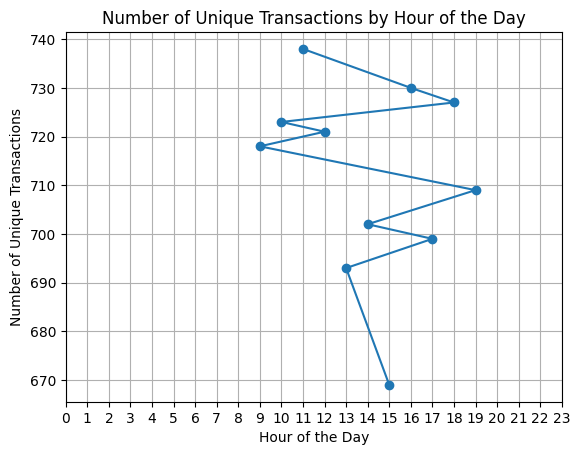

In [41]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
busiest_hour = data.groupby('hour')['transaction_id'].nunique()
busiest_hour_sorted = busiest_hour.sort_values(ascending=False)
print(busiest_hour.sort_values(ascending = False))

plt.plot(busiest_hour_sorted.index, busiest_hour_sorted.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Unique Transactions')
plt.title('Number of Unique Transactions by Hour of the Day')
plt.xticks(range(24))  # To show all hours on the x-axis
plt.grid(True)
plt.show()